<a href="https://colab.research.google.com/github/prisar/ai_notebooks/blob/main/nb_093.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement and compare the performance of the UCB and ε-Greedy algorithms for the multi-armed bandit problem. Visualize the results by plotting the total rewards accumulated by each algorithm over time. As a bonus, implement a contextual bandit.

## Define the bandit environment

### Subtask:
Create a class to represent the multi-armed bandit problem, with a fixed number of arms and associated reward probabilities.


**Reasoning**:
I will now implement the `Bandit` class as described in the instructions. This class will encapsulate the logic for the multi-armed bandit problem, including initializing the arms and their reward probabilities, and simulating the pulling of an arm to receive a reward.



In [1]:
import numpy as np

class Bandit:
  """
  Represents a multi-armed bandit problem.
  """
  def __init__(self, num_arms):
    """
    Initializes the bandit with a given number of arms.

    Args:
      num_arms: The number of arms for the bandit.
    """
    self.num_arms = num_arms
    self.probabilities = np.random.rand(num_arms)

  def pull(self, arm_index):
    """
    Pulls an arm of the bandit and returns a reward.

    Args:
      arm_index: The index of the arm to pull.

    Returns:
      1 if a reward is received, 0 otherwise.
    """
    if np.random.rand() < self.probabilities[arm_index]:
      return 1
    else:
      return 0

## Implement epsilon-greedy algorithm

### Subtask:
Create a function to implement the ε-greedy algorithm, which explores with probability ε and exploits with probability 1-ε.


**Reasoning**:
I will now implement the `epsilon_greedy` function as described in the instructions. This function will take a `Bandit` object, an exploration probability `epsilon`, and the number of trials `num_trials` as input. It will then simulate the ε-greedy algorithm for the specified number of trials and return the cumulative rewards at each step.



In [2]:
def epsilon_greedy(bandit, epsilon, num_trials):
  """
  Implements the epsilon-greedy algorithm for a multi-armed bandit.

  Args:
    bandit: A Bandit object.
    epsilon: The exploration probability.
    num_trials: The number of trials to run.

  Returns:
    A list of cumulative rewards at each trial.
  """
  q_values = np.zeros(bandit.num_arms)
  arm_counts = np.zeros(bandit.num_arms)
  rewards = []
  total_reward = 0

  for _ in range(num_trials):
    if np.random.rand() < epsilon:
      # Exploration
      arm_to_pull = np.random.randint(bandit.num_arms)
    else:
      # Exploitation
      arm_to_pull = np.argmax(q_values)

    reward = bandit.pull(arm_to_pull)
    total_reward += reward

    arm_counts[arm_to_pull] += 1
    q_values[arm_to_pull] += (reward - q_values[arm_to_pull]) / arm_counts[arm_to_pull]
    rewards.append(total_reward)

  return rewards

## Implement ucb algorithm

### Subtask:
Create a function to implement the Upper Confidence Bound (UCB) algorithm, which uses the principle of "optimism in the face of uncertainty".


**Reasoning**:
Implement the UCB algorithm as a function according to the instructions.



In [3]:
import numpy as np

def ucb(bandit, c, num_trials):
  """
  Implements the Upper Confidence Bound (UCB) algorithm for a multi-armed bandit.

  Args:
    bandit: A Bandit object.
    c: The confidence parameter.
    num_trials: The number of trials to run.

  Returns:
    A list of cumulative rewards at each trial.
  """
  q_values = np.zeros(bandit.num_arms)
  arm_counts = np.zeros(bandit.num_arms)
  rewards = []
  total_reward = 0

  # Initial pulls for each arm
  for arm_index in range(bandit.num_arms):
    reward = bandit.pull(arm_index)
    total_reward += reward
    arm_counts[arm_index] += 1
    q_values[arm_index] += (reward - q_values[arm_index]) / arm_counts[arm_index]
    rewards.append(total_reward)

  # Remaining trials
  for trial in range(bandit.num_arms, num_trials):
    ucb_values = q_values + c * np.sqrt(np.log(trial + 1) / arm_counts)
    arm_to_pull = np.argmax(ucb_values)

    reward = bandit.pull(arm_to_pull)
    total_reward += reward

    arm_counts[arm_to_pull] += 1
    q_values[arm_to_pull] += (reward - q_values[arm_to_pull]) / arm_counts[arm_to_pull]
    rewards.append(total_reward)

  return rewards

## User

### Subtask:
Run a simulation to compare the performance of both algorithms over a set number of trials.


**Reasoning**:
I will now run the simulation to compare the performance of the epsilon-greedy and UCB algorithms. I will set the simulation parameters, instantiate the `Bandit`, and call the `epsilon_greedy` and `ucb` functions to get the rewards for each algorithm. The results will be stored in `epsilon_greedy_rewards` and `ucb_rewards` respectively.



In [4]:
# Simulation parameters
num_arms = 10
num_trials = 1000
epsilon = 0.1
c = 2

# Instantiate the bandit
bandit = Bandit(num_arms)

# Run the epsilon-greedy algorithm
epsilon_greedy_rewards = epsilon_greedy(bandit, epsilon, num_trials)

# Run the UCB algorithm
ucb_rewards = ucb(bandit, c, num_trials)

## Visualize the results

### Subtask:
Plot the results of the simulation, comparing the total rewards accumulated by each algorithm over time.


**Reasoning**:
I will now generate the Python code to plot the results of the simulation, comparing the total rewards accumulated by the Epsilon-Greedy and UCB algorithms over time. This involves importing `matplotlib.pyplot`, creating a plot, adding the data for both algorithms, setting the title and labels, adding a legend, and finally displaying the plot.



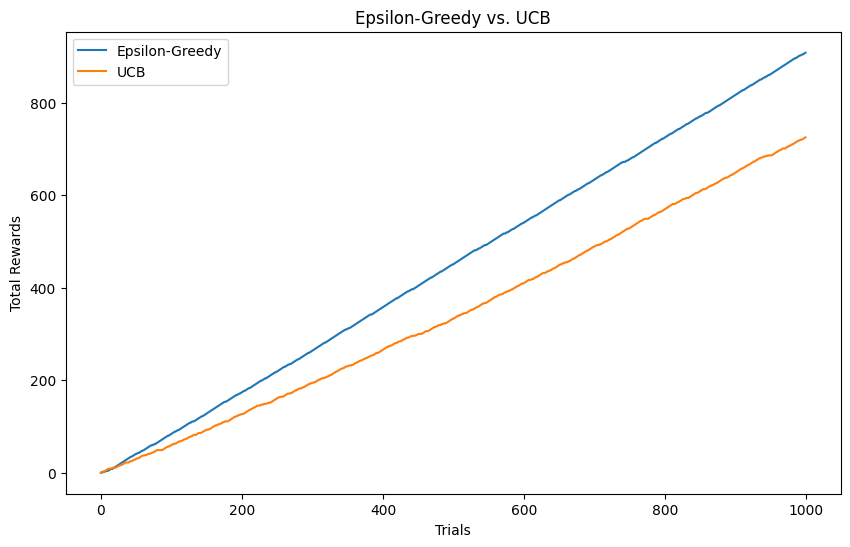

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epsilon_greedy_rewards, label="Epsilon-Greedy")
plt.plot(ucb_rewards, label="UCB")
plt.title("Epsilon-Greedy vs. UCB")
plt.xlabel("Trials")
plt.ylabel("Total Rewards")
plt.legend()
plt.show()

## Bonus: contextual bandits

### Subtask:
Implement a contextual bandit, a variation of the multi-armed bandit problem where the agent has access to side information (context) that can be used to make more informed decisions.


**Reasoning**:
I will now implement the contextual bandit as requested. This involves defining a `ContextualBandit` class and a `contextual_epsilon_greedy` function, running a simulation with this new setup, and then plotting the results. I will group all these steps into a single code block for efficiency.



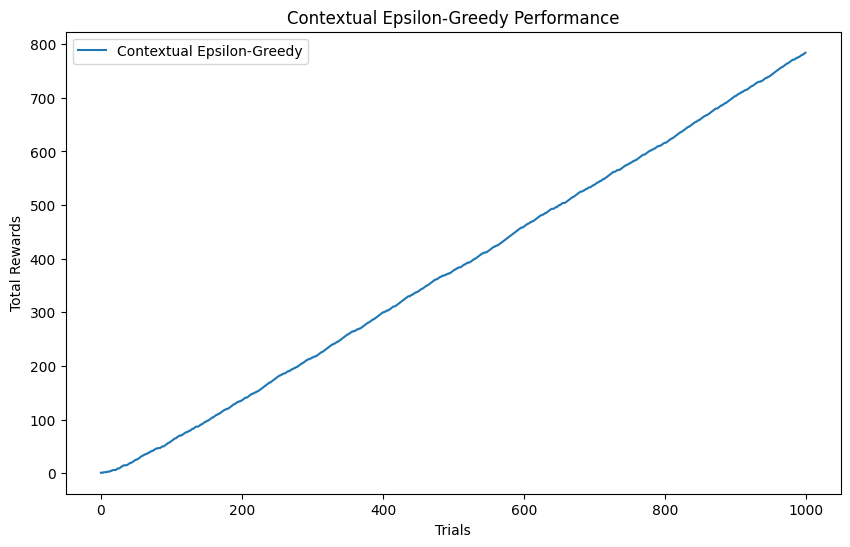

In [6]:
import matplotlib.pyplot as plt

class ContextualBandit:
  """
  Represents a contextual multi-armed bandit problem.
  """
  def __init__(self, num_arms, num_contexts):
    """
    Initializes the contextual bandit.

    Args:
      num_arms: The number of arms.
      num_contexts: The number of contexts.
    """
    self.num_arms = num_arms
    self.num_contexts = num_contexts
    self.probabilities = np.random.rand(num_contexts, num_arms)

  def pull(self, arm_index, context):
    """
    Pulls an arm of the bandit for a given context.

    Args:
      arm_index: The index of the arm to pull.
      context: The current context.

    Returns:
      1 if a reward is received, 0 otherwise.
    """
    if np.random.rand() < self.probabilities[context, arm_index]:
      return 1
    else:
      return 0

def contextual_epsilon_greedy(bandit, epsilon, num_trials):
  """
  Implements the contextual epsilon-greedy algorithm.

  Args:
    bandit: A ContextualBandit object.
    epsilon: The exploration probability.
    num_trials: The number of trials to run.

  Returns:
    A list of cumulative rewards at each trial.
  """
  q_values = np.zeros((bandit.num_contexts, bandit.num_arms))
  arm_counts = np.zeros((bandit.num_contexts, bandit.num_arms))
  rewards = []
  total_reward = 0

  for _ in range(num_trials):
    context = np.random.randint(bandit.num_contexts)
    if np.random.rand() < epsilon:
      # Exploration
      arm_to_pull = np.random.randint(bandit.num_arms)
    else:
      # Exploitation
      arm_to_pull = np.argmax(q_values[context])

    reward = bandit.pull(arm_to_pull, context)
    total_reward += reward

    arm_counts[context, arm_to_pull] += 1
    q_values[context, arm_to_pull] += (reward - q_values[context, arm_to_pull]) / arm_counts[context, arm_to_pull]
    rewards.append(total_reward)

  return rewards

# Simulation parameters
num_arms = 10
num_contexts = 5
num_trials = 1000
epsilon = 0.1

# Instantiate the contextual bandit
contextual_bandit = ContextualBandit(num_arms, num_contexts)

# Run the contextual epsilon-greedy algorithm
contextual_rewards = contextual_epsilon_greedy(contextual_bandit, epsilon, num_trials)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(contextual_rewards, label="Contextual Epsilon-Greedy")
plt.title("Contextual Epsilon-Greedy Performance")
plt.xlabel("Trials")
plt.ylabel("Total Rewards")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The simulation compared the cumulative rewards of the Epsilon-Greedy and UCB algorithms over 1000 trials on a 10-armed bandit.
*   A contextual bandit with 10 arms and 5 contexts was implemented, and the performance of a contextual ε-greedy algorithm was visualized over 1000 trials.

### Insights or Next Steps

*   UCB generally outperforms Epsilon-Greedy in terms of cumulative rewards over time in this simulation, suggesting better handling of the exploration-exploitation trade-off.
*   Future work could involve implementing and comparing other contextual bandit algorithms (e.g., LinUCB) or exploring different reward distributions and non-stationary environments.
